In [2]:
import pandas as pd
import sys
sys.path.append('./working_files')
from working_files.functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from openbb import obb
import statsmodels.tsa.stattools as ts 
obb.user.preferences.output_type = 'dataframe'

In [16]:
stocks = [
    "AAPL",  # Apple Inc.
    "MSFT",  # Microsoft Corporation
    "GOOGL", # Alphabet Inc. (Class A)
    "AMZN",  # Amazon.com Inc.
    # # "META",  # Meta Platforms Inc.
    # "NVDA",  # NVIDIA Corporation
    # "TSLA",  # Tesla Inc.
    # "JPM",   # JPMorgan Chase & Co.
    # "V",     # Visa Inc.
    # "AMD", # AMD 
    # "KO", # Coca Cola
    # "SBUX", #Starbucks
    # "PEP", # Pepsi
    # "GE", # General Electric
    # "GM", # General Motors
    # "NFLX", # Netflix
    # "RBLX", # Roblox
    # "SONY", # Sony
    # "WMT", # Walmart
    # "IBM", # IBM
    # "TGT", # target
    # "COF" # Capital One,
    # "BRK.B" # berkshire hathaway

]


In [18]:
def data_collector(list_stocks):
    stock_data = {}
    for stock in stocks:
        df = adding_relevant_columns(stock_insights(obb.equity.price.historical(stock, provider = 'yfinance')))
        stock_data[stock] = df
    return stock_data

def combining_stock_data(stocks_of_interest, timeperiod = '2024-01-01'):
    dataframe = pd.DataFrame()
    names = list()
    for name in stocks_of_interest:
        dataframe = pd.concat([dataframe,stock_insights(obb.equity.price.historical(name, provider = 'yfinance'))['close']],
                    axis = 1)
        names.append(name)
        dataframe.columns = names
    dataframe.index = pd.to_datetime(dataframe.index)
    dataframe = dataframe[dataframe.index > pd.to_datetime(timeperiod)]
    correlation = dataframe.corr()
    return dataframe, correlation


data, correlation = combining_stock_data(data_collector(stocks))
    
def identifying_pairs_stocks_highly_correlated(matrix = correlation):
    threshhold = 0.80
    highly_correlated_stocks = {}
    for column in range(len(matrix.columns)):
        for row in range(column + 1, len(matrix)):
            # column value
            col1 = matrix.columns[column]
            # row value
            col2 = matrix.columns[row]
            true_correlation_value = matrix.loc[col1,col2]
            if true_correlation_value > threshhold:
                highly_correlated_stocks[true_correlation_value] = [col1,col2]
    return highly_correlated_stocks

correlation = identifying_pairs_stocks_highly_correlated()


def combining_stock_data(stocks_of_interest, timeperiod = '2024-01-01'):
    dataframe = pd.DataFrame()
    names = list()
    for name in stocks_of_interest:
        dataframe = pd.concat([dataframe,stock_insights(obb.equity.price.historical(name, provider = 'yfinance'))['close']],
                    axis = 1)
        names.append(name)
        dataframe.columns = names
    dataframe.index = pd.to_datetime(dataframe.index)
    dataframe = dataframe[dataframe.index > pd.to_datetime(timeperiod)]
    correlation = dataframe.corr()
    return dataframe, correlation

def calculating_spread(correlated_stocks = correlation):
    spreads = {}
    for pair in correlated_stocks.values():
        stock1,stock2 = pair[0], pair[1]
        spread = data_collector(stock1)[stock1]['close'] -  data_collector(stock2)[stock2]['close']
        spreads[stock1,stock2] = spread.abs()
    return spreads

spread = calculating_spread()

print(correlation)
print(spread)


{0.8118910268773318: ['GOOGL', 'AMZN']}
{('GOOGL', 'AMZN'): date
2024-07-08    10.259995
2024-07-09    10.360001
2024-07-10     8.610001
2024-07-11     9.479996
2024-07-12     9.419998
                ...    
2025-06-30    43.160004
2025-07-01    44.620010
2025-07-02    41.279999
2025-07-03    43.880005
2025-07-07    46.600006
Name: close, Length: 250, dtype: float64}


In [ ]:
figure(figsize=(16, 10), dpi=200)
sns.heatmap(correlation_across, annot = True)

In [ ]:
# The null hypothesis is no cointegration
h1 is there is cointegrtion
result = ts.coint(closing_v, closing_jpm)

result

In [ ]:
# Returns¶
# coint_tfloat
# The t-statistic of unit-root test on residuals.

# pvaluefloat
# MacKinnon”s approximate, asymptotic p-value based on MacKinnon (1994).

crit_valuedict
# Critical values for the test statistic at the 1 %, 5 %, and 10 % levels based on regression curve. This depends on the number of observations.

In [14]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

if p_val < float(0.05):
    print(f'Passed')
else:
    print(f'Did not pass')

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.5219377124724076
Did not pass


In [335]:
from statsmodels.tsa.stattools import adfuller
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
visa_ADF = adfuller(closing_v)
print('P value for the Augmented Dickey-Fuller Test is', visa_ADF[1])
jpm_ADF = adfuller(closing_jpm)
print('P value for the Augmented Dickey-Fuller Test is', jpm_ADF[1])
Spread_ADF = adfuller(closing_v - closing_jpm)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(closing_v / closing_jpm)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.


P value for the Augmented Dickey-Fuller Test is 0.6517634737310476
P value for the Augmented Dickey-Fuller Test is 0.7920267125666891
P value for the Augmented Dickey-Fuller Test is 0.3028494933372312
P value for the Augmented Dickey-Fuller Test is 0.18141923453150116


Text(0.5, 1.0, 'Price Ratio between visa and jpm')

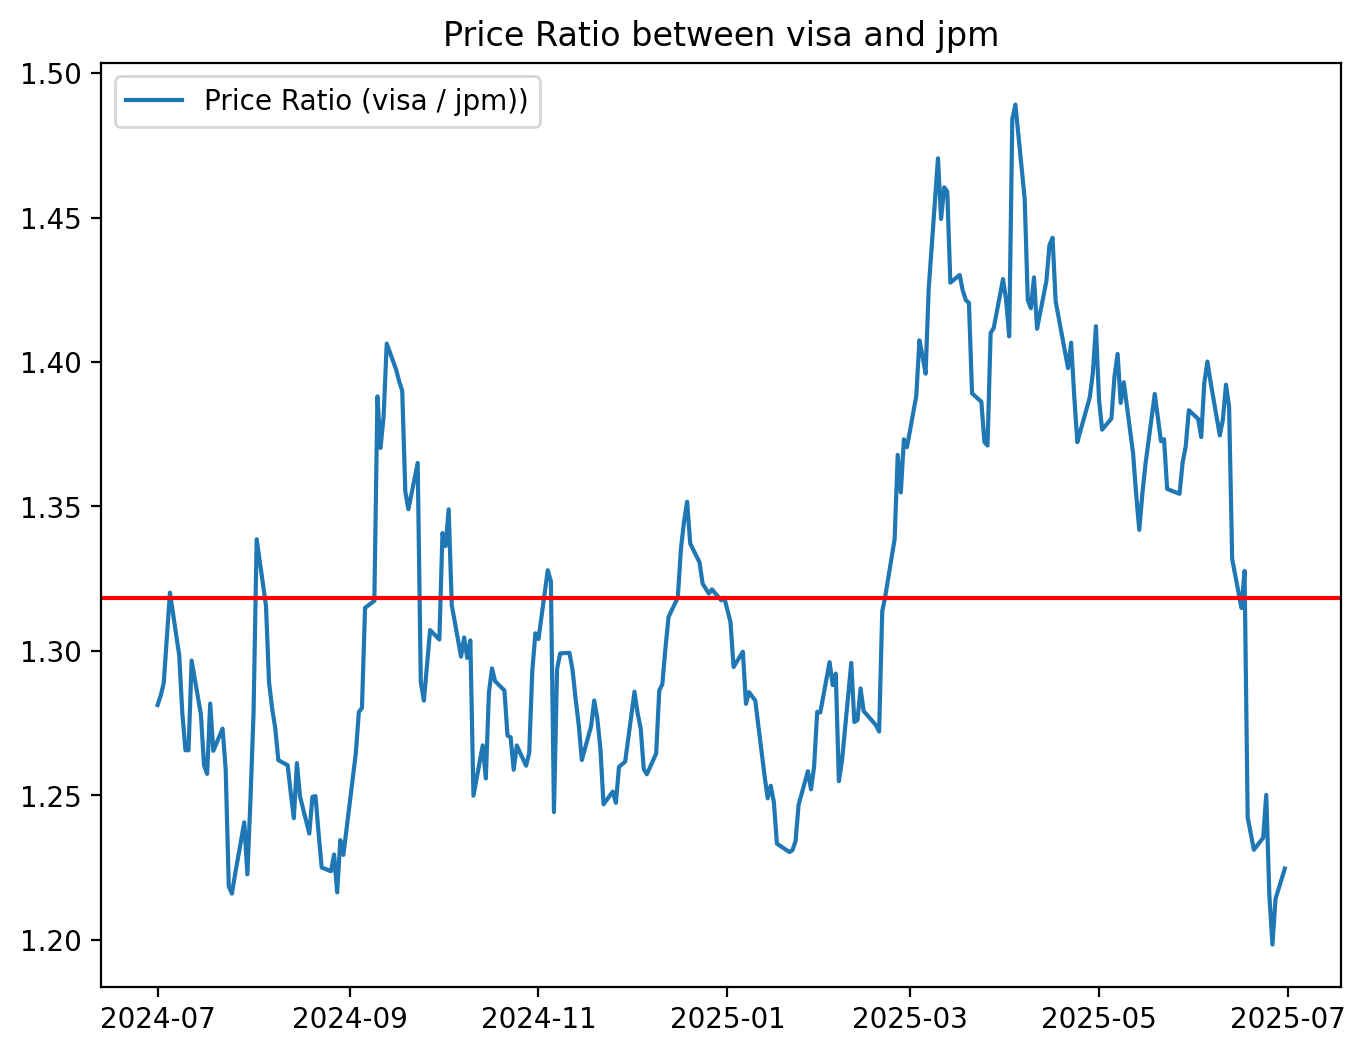

In [321]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = closing_v / closing_jpm
plt.plot(ratio, label = 'Price Ratio (visa / jpm))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between visa and jpm")

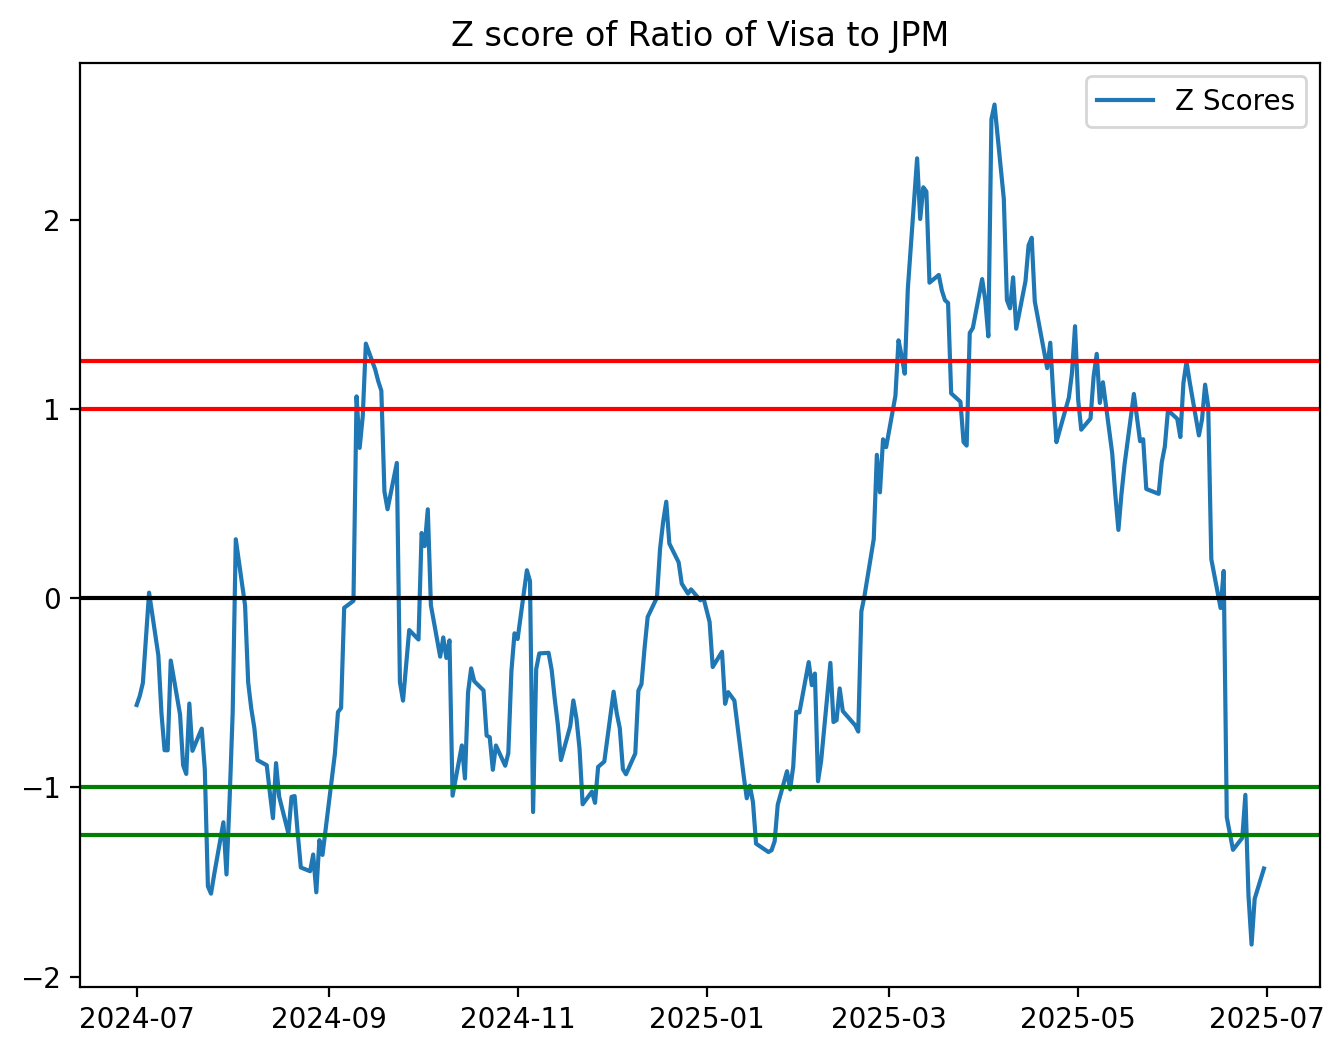

In [333]:

figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Visa to JPM')
plt.show()


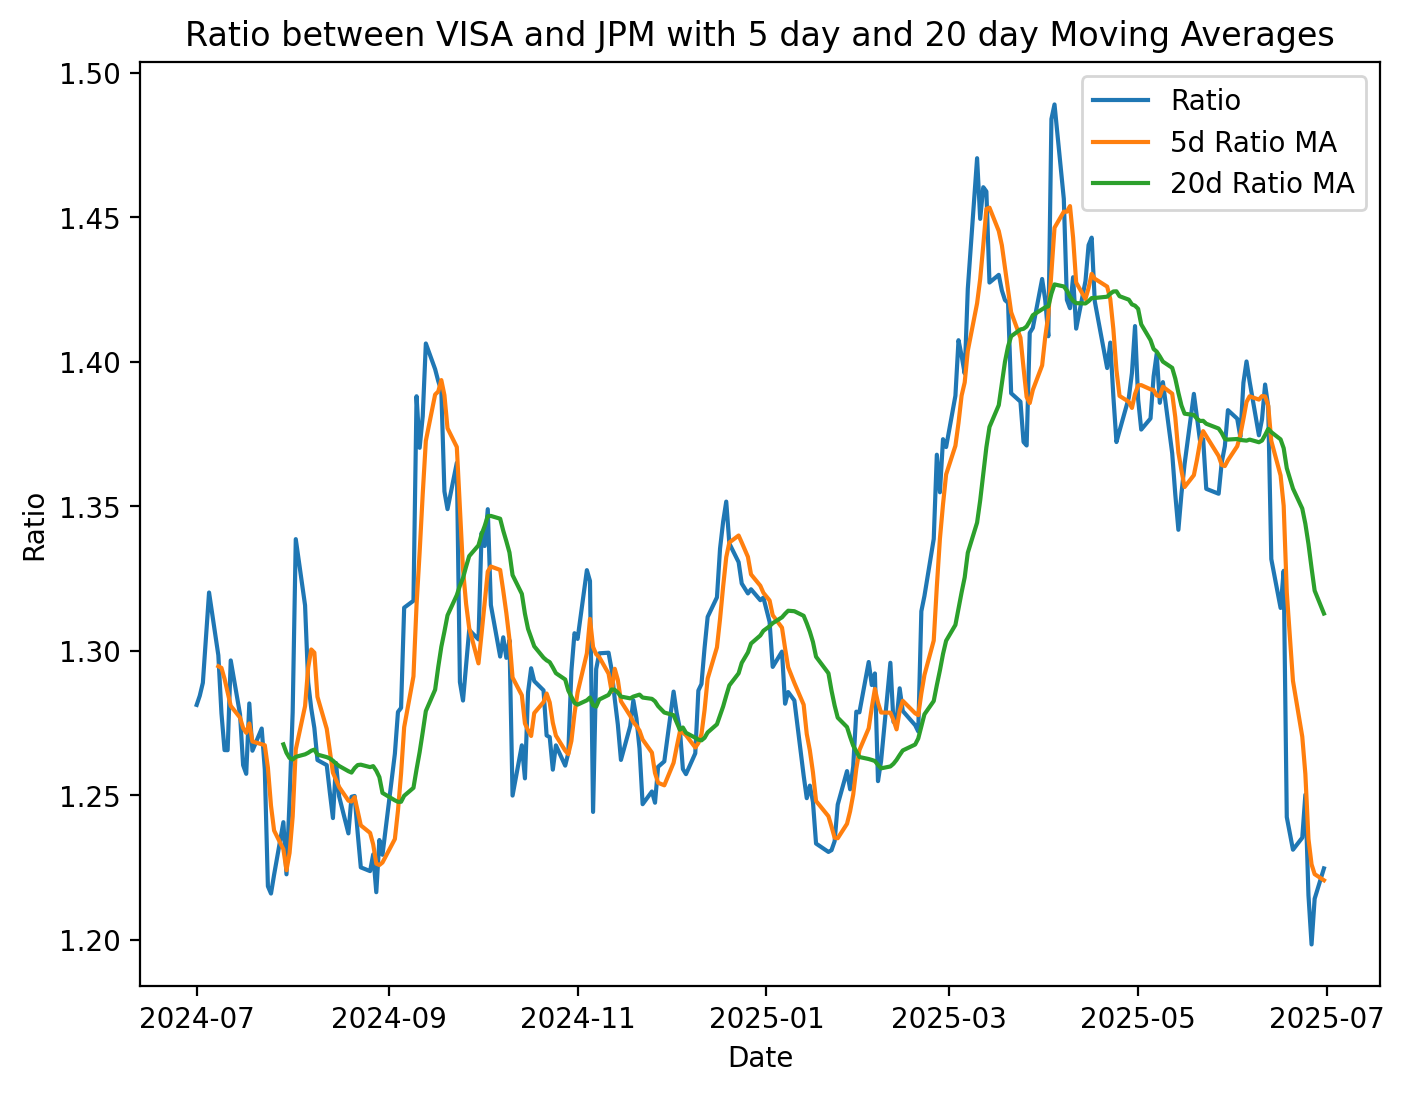

In [327]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between VISA and JPM with 5 day and 20 day Moving Averages')
plt.show()

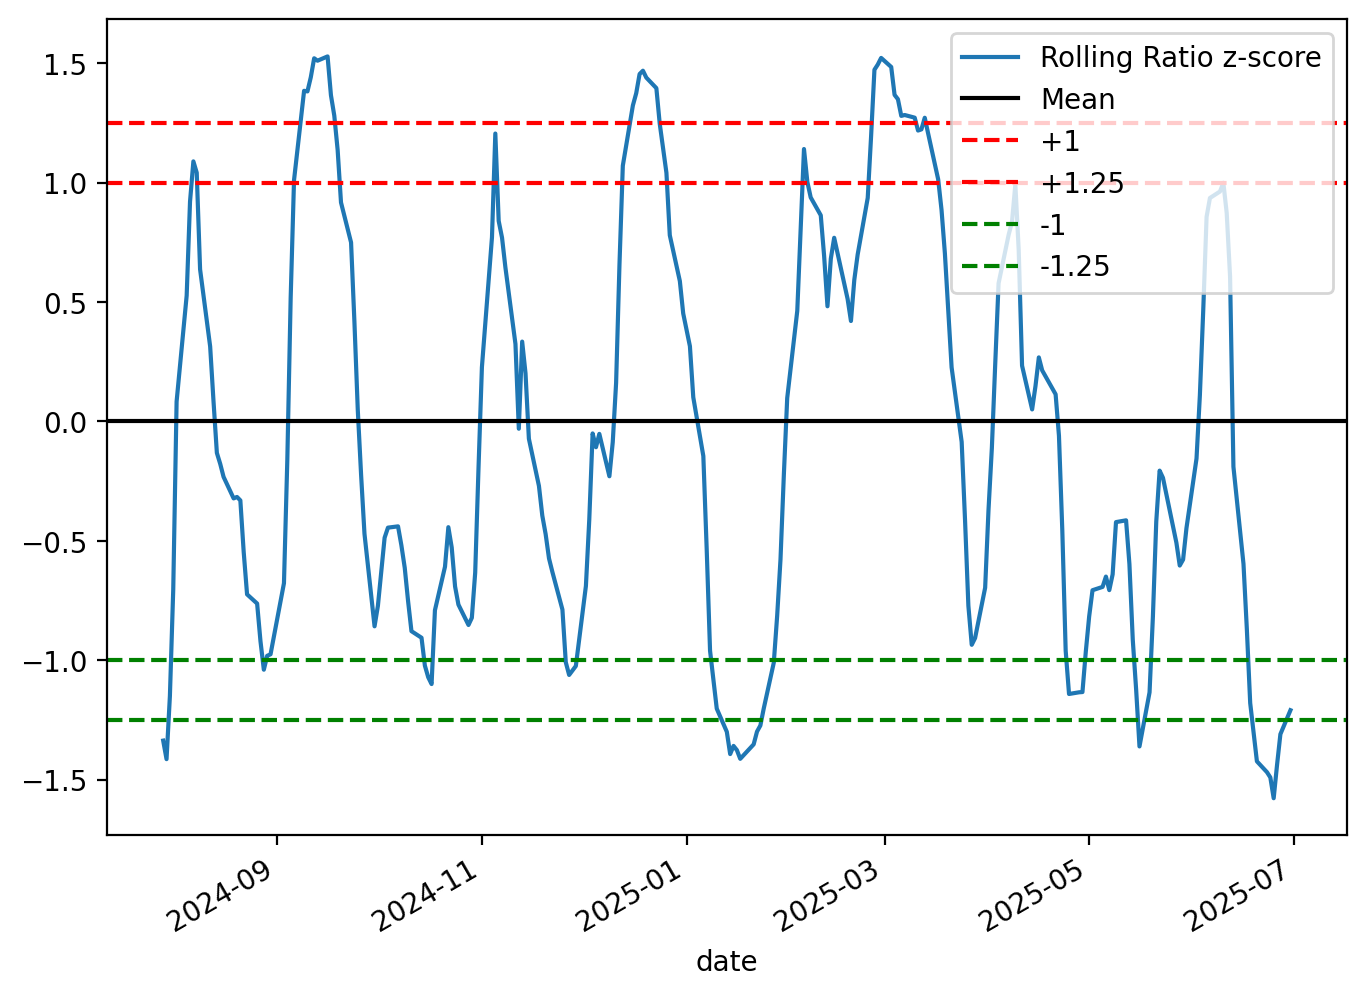

In [329]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

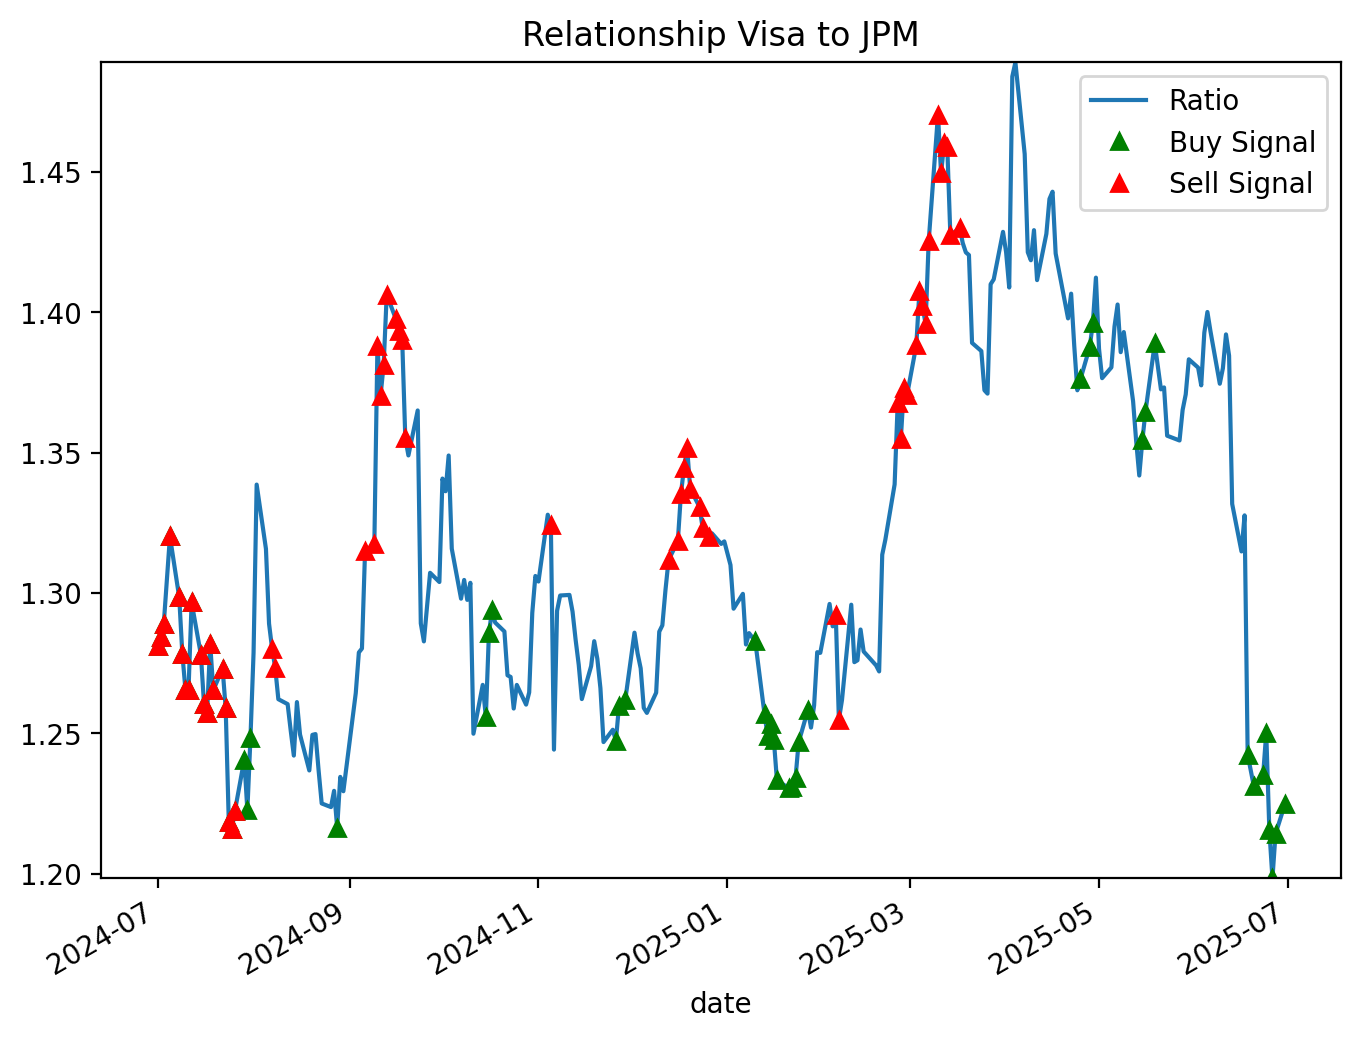

In [331]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship Visa to JPM')
plt.show()

In [238]:
# this is typically the functions we use for importing fundamental data
obb.equity.fundamental.metrics(
    "AAPL",
    provider = "yfinance")

,symbol,market_cap,pe_ratio,forward_pe,peg_ratio_ttm,enterprise_to_ebitda,earnings_growth,earnings_growth_quarterly,revenue_per_share,revenue_growth,...,price_to_book,enterprise_value,overall_risk,audit_risk,board_risk,compensation_risk,shareholder_rights_risk,beta,price_return_1y,currency
0,AAPL,2.990371e+12,31.234789,24.09326,1.8326,21.985,0.078,0.048,26.455,0.051,...,44.780807,3052983812096,1.0,7.0,1.0,3.0,1.0,1.211,-0.072295,USD


In [239]:
options = obb.derivatives.options.chains('AAPL', provider="yfinance")
options.head()

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,last_trade_price,last_trade_time,bid,ask,change,change_percent,implied_volatility,in_the_money,currency
0,AAPL,200.19,AAPL250703C00110000,2025-07-03,3,110.0,call,438,15,90.10,2025-06-30 11:58:03-04:00,89.85,90.75,-1.389999,-0.015193,2.410160,True,USD
1,AAPL,200.19,AAPL250703P00110000,2025-07-03,3,110.0,put,98,2,0.01,2025-06-23 14:09:18-04:00,0.00,0.01,0.000000,0.000000,1.781251,False,USD
2,AAPL,200.19,AAPL250703P00120000,2025-07-03,3,120.0,put,10,1,0.01,2025-06-26 11:30:12-04:00,0.00,0.01,0.000000,0.000000,1.531252,False,USD
3,AAPL,200.19,AAPL250703P00125000,2025-07-03,3,125.0,put,10,5,0.01,2025-06-23 15:31:09-04:00,0.00,0.01,0.000000,0.000000,1.437503,False,USD
4,AAPL,200.19,AAPL250703P00130000,2025-07-03,3,130.0,put,7,2,0.02,2025-06-30 09:30:00-04:00,0.00,0.01,0.010000,1.000000,1.312503,False,USD
